# Project: PRCP-1017-Automobile Imports Price Prediction

Description
- (a) the specification of an auto in terms of various characteristics, 
- (b) its assigned insurance risk rating, 
- (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates. 
- Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
- The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

Number of Instances: 205

Number of Attributes: 26 total, 15 continuous, 1 integer, 10 nominal

Attribute Information: 
  1. symboling        :        -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make             :        alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type        :        diesel, gas.
  5. aspiration       :        std, turbo.
  6. num-of-doors     :        four, two.
  7. body-style       :        hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels     :        4wd, fwd, rwd.
  9. engine-location  :        front, rear.
  10. wheel-base       :        continuous from 86.6 120.9.
  11. length           :        continuous from 141.1 to 208.1.
  12. width            :        continuous from 60.3 to 72.3.
  13. height           :        continuous from 47.8 to 59.8.
  14. curb-weight      :        continuous from 1488 to 4066.
  15. engine-type      :        dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
  16. num-of-cylinders :        eight, five, four, six, three, twelve, two.
  17. engine-size      :        continuous from 61 to 326.
  18. fuel-system      :        1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
  19. bore             :        continuous from 2.54 to 3.94.
  20. stroke           :        continuous from 2.07 to 4.17.
  21. compression-ratio:        continuous from 7 to 23.
  22. horsepower       :        continuous from 48 to 288.
  23. peak-rpm         :        continuous from 4150 to 6600.
  24. city-mpg         :        continuous from 13 to 49.
  25. highway-mpg      :        continuous from 16 to 54.
  26. price            :        continuous from 5118 to 45400.

In [108]:
# Libraries
#########################################################

import numpy as np
from numpy import loadtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import model_selection, neighbors

#!pip install catboost
#!pip install pydotplus
#!pip install skompiler
#!pip install astor
#!pip install joblib

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, export_text
from math import sqrt
from skompiler import skompile

import warnings
import joblib
import pydotplus
import graphviz

pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from pandas.core.common import SettingWithCopyWarning
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Data Collection

In [2]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--", "?", " "]
df = pd.read_csv(r"auto_imports.csv", na_values = missing_values)

In [3]:
# Labeling Data

df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
              'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [4]:
def check_df(dataframe, head=10):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(200, 26)
##################### Types #####################
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object
##################### Head #####################
   symboling  normalized-losses         make fuel-type aspiration num-of-

In [5]:
df["price"].head(50)
df["price"].isnull().sum()

0

In [6]:
# 'price' variable must be numeric.
df["price"] = pd.to_numeric(df["price"], errors='coerce')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,200.000,0.830,1.249,-2.000,0.000,1.000,2.000,3.000
normalized-losses,164.000,122.000,35.442,65.000,94.000,115.000,150.000,256.000
wheel-base,200.000,98.848,6.038,86.600,94.500,97.000,102.400,120.900
length,200.000,174.228,12.347,141.100,166.675,173.200,183.500,208.100
width,200.000,65.898,2.103,60.300,64.175,65.500,66.675,72.000
height,200.000,53.792,2.428,47.800,52.000,54.100,55.525,59.800
curb-weight,200.000,2555.705,518.595,1488.000,2163.000,2414.000,2928.250,4066.000
engine-size,200.000,126.860,41.651,61.000,97.750,119.500,142.000,326.000
bore,196.000,3.330,0.271,2.540,3.150,3.310,3.590,3.940
stroke,196.000,3.260,0.317,2.070,3.110,3.290,3.410,4.170


In [8]:
df["price"].unique()

array([16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430, 16925,
       20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,  6575,
        5572,  6377,  7957,  6229,  6692,  7609,  8558,  8921, 12964,
        6479,  6855,  5399,  6529,  7129,  7295,  7895,  9095,  8845,
       10295, 12945, 10345,  6785, 11048, 32250, 35550, 36000,  5195,
        6095,  6795,  6695,  7395, 10945, 11845, 13645, 15645,  8495,
       10595, 10245, 10795, 11245, 18280, 18344, 25552, 28248, 28176,
       31600, 34184, 35056, 40960, 45400, 16503,  5389,  6189,  6669,
        7689,  9959,  8499, 12629, 14869, 14489,  6989,  8189,  9279,
        5499,  7099,  6649,  6849,  7349,  7299,  7799,  7499,  7999,
        8249,  8949,  9549, 13499, 14399, 17199, 19699, 18399, 11900,
       13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630, 17950,
       18150, 12764, 22018, 32528, 34028, 37028,  9295,  9895, 11850,
       12170, 15040, 15510, 18620,  5118,  7053,  7603,  7126,  7775,
        9960,  9233,

In [9]:
df["price"].nunique()

185

## Searching for categorical and numeric variables

In [10]:
# 1- Searching for categorical and numeric variables

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat


cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 200
Variables: 26
cat_cols: 10
num_cols: 15
cat_but_car: 1
num_but_cat: 1


In [11]:
cat_cols

['fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'symboling']

In [12]:
num_cols

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [13]:
cat_but_car

['make']

In [14]:
num_but_cat

['symboling']

In [15]:
df.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111.000,5000.000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154.000,5000.000,19,26,16500
2,2,164.000,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102.000,5500.000,24,30,13950
3,2,164.000,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115.000,5500.000,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.800,177.300,66.300,53.100,2507,ohc,five,136,mpfi,3.190,3.400,8.500,110.000,5500.000,19,25,15250
5,1,158.000,audi,gas,std,four,sedan,fwd,front,105.800,192.700,71.400,55.700,2844,ohc,five,136,mpfi,3.190,3.400,8.500,110.000,5500.000,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.800,192.700,71.400,55.700,2954,ohc,five,136,mpfi,3.190,3.400,8.500,110.000,5500.000,19,25,18920
7,1,158.000,audi,gas,turbo,four,sedan,fwd,front,105.800,192.700,71.400,55.900,3086,ohc,five,131,mpfi,3.130,3.400,8.300,140.000,5500.000,17,20,23875
8,2,192.000,bmw,gas,std,two,sedan,rwd,front,101.200,176.800,64.800,54.300,2395,ohc,four,108,mpfi,3.500,2.800,8.800,101.000,5800.000,23,29,16430
9,0,192.000,bmw,gas,std,four,sedan,rwd,front,101.200,176.800,64.800,54.300,2395,ohc,four,108,mpfi,3.500,2.800,8.800,101.000,5800.000,23,29,16925


In [1]:
df.make.unique()



NameError: name 'df' is not defined

        fuel-type  Ratio
gas           180  9.000
diesel         20  1.000
##########################################


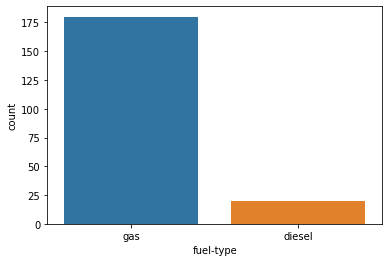

       aspiration  Ratio
std           164  8.200
turbo          36  1.800
##########################################


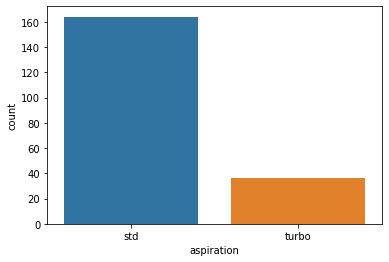

      num-of-doors  Ratio
four           113  5.650
two             85  4.250
##########################################


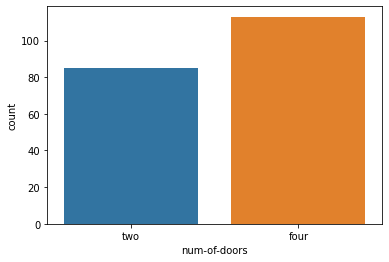

             body-style  Ratio
sedan                94  4.700
hatchback            68  3.400
wagon                25  1.250
hardtop               8  0.400
convertible           5  0.250
##########################################


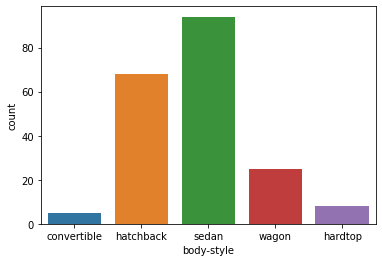

     drive-wheels  Ratio
fwd           118  5.900
rwd            74  3.700
4wd             8  0.400
##########################################


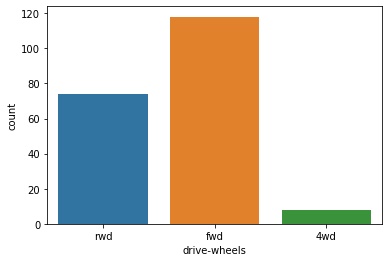

       engine-location  Ratio
front              197  9.850
rear                 3  0.150
##########################################


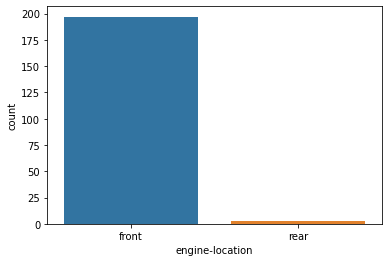

       engine-type  Ratio
ohc            145  7.250
ohcf            15  0.750
ohcv            13  0.650
l               12  0.600
dohc            11  0.550
rotor            4  0.200
##########################################


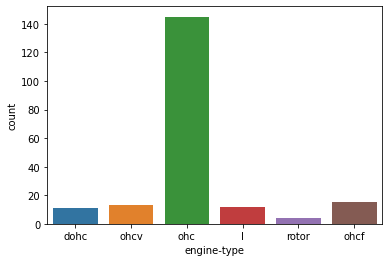

        num-of-cylinders  Ratio
four                 156  7.800
six                   24  1.200
five                  10  0.500
two                    4  0.200
eight                  4  0.200
three                  1  0.050
twelve                 1  0.050
##########################################


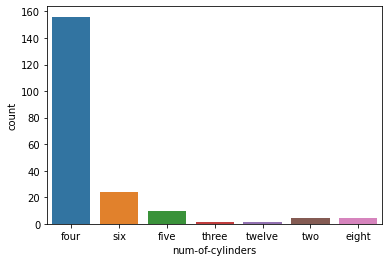

      fuel-system  Ratio
mpfi           91  4.550
2bbl           64  3.200
idi            20  1.000
1bbl           11  0.550
spdi            9  0.450
4bbl            3  0.150
mfi             1  0.050
spfi            1  0.050
##########################################


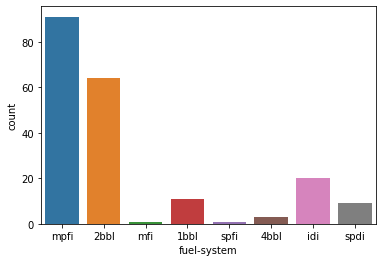

    symboling  Ratio
 0         65  3.250
 1         52  2.600
 2         32  1.600
 3         26  1.300
-1         22  1.100
-2          3  0.150
##########################################


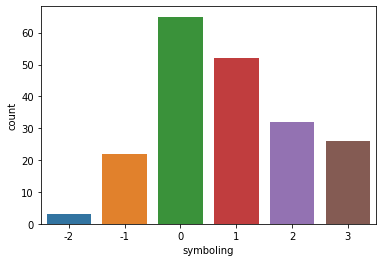

In [16]:
# 2- Analysis of Categorical Variables

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 10 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)

count   164.000
mean    122.000
std      35.442
min      65.000
5%       74.000
50%     115.000
90%     164.000
95%     188.000
99%     209.580
max     256.000
Name: normalized-losses, dtype: float64


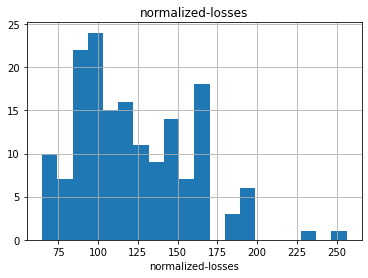

count   200.000
mean     98.848
std       6.038
min      86.600
5%       93.095
50%      97.000
90%     107.900
95%     110.100
99%     115.600
max     120.900
Name: wheel-base, dtype: float64


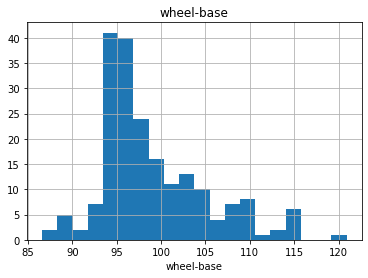

count   200.000
mean    174.228
std      12.347
min     141.100
5%      157.300
50%     173.200
90%     188.820
95%     197.095
99%     202.600
max     208.100
Name: length, dtype: float64


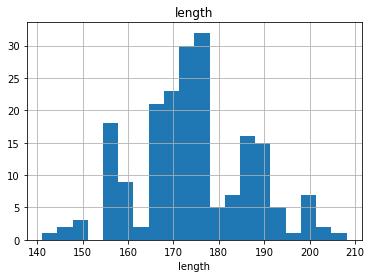

count   200.000
mean     65.898
std       2.103
min      60.300
5%       63.600
50%      65.500
90%      68.440
95%      70.310
99%      71.700
max      72.000
Name: width, dtype: float64


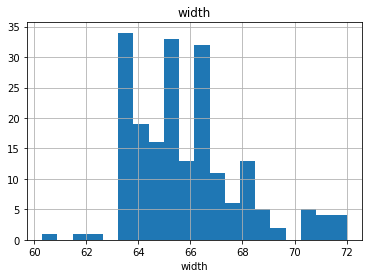

count   200.000
mean     53.792
std       2.428
min      47.800
5%       49.700
50%      54.100
90%      56.700
95%      57.540
99%      59.107
max      59.800
Name: height, dtype: float64


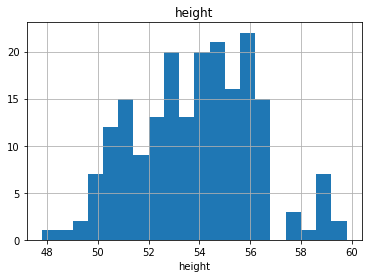

count    200.000
mean    2555.705
std      518.595
min     1488.000
5%      1904.750
50%     2414.000
90%     3230.000
95%     3505.500
99%     3951.160
max     4066.000
Name: curb-weight, dtype: float64


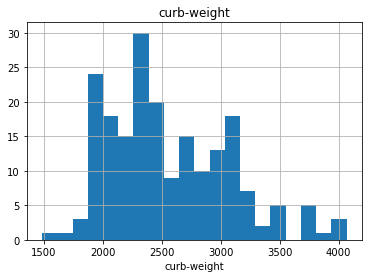

count   200.000
mean    126.860
std      41.651
min      61.000
5%       90.000
50%     119.500
90%     181.000
95%     194.750
99%     304.040
max     326.000
Name: engine-size, dtype: float64


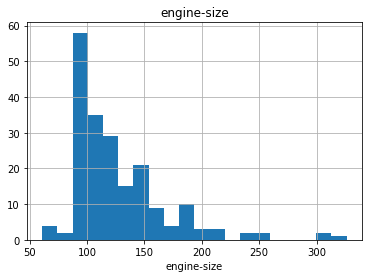

count   196.000
mean      3.330
std       0.271
min       2.540
5%        2.958
50%       3.310
90%       3.665
95%       3.780
99%       3.800
max       3.940
Name: bore, dtype: float64


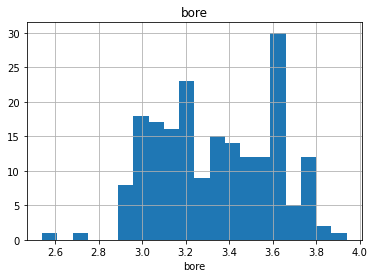

count   196.000
mean      3.260
std       0.317
min       2.070
5%        2.640
50%       3.290
90%       3.560
95%       3.640
99%       3.914
max       4.170
Name: stroke, dtype: float64


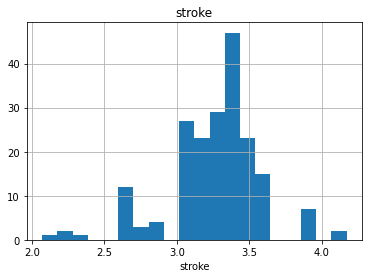

count   200.000
mean     10.170
std       4.014
min       7.000
5%        7.500
50%       9.000
90%      12.450
95%      21.905
99%      23.000
max      23.000
Name: compression-ratio, dtype: float64


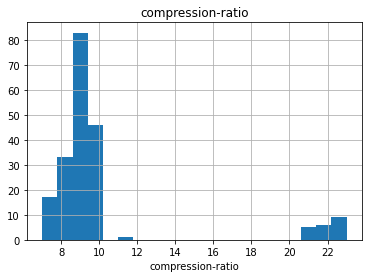

count   198.000
mean    103.359
std      37.645
min      48.000
5%       62.000
50%      95.000
90%     160.000
95%     176.900
99%     207.000
max     262.000
Name: horsepower, dtype: float64


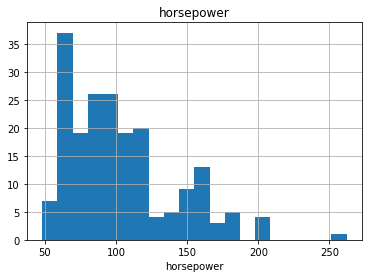

count    198.000
mean    5118.182
std      481.667
min     4150.000
5%      4242.500
50%     5200.000
90%     5800.000
95%     6000.000
99%     6018.000
max     6600.000
Name: peak-rpm, dtype: float64


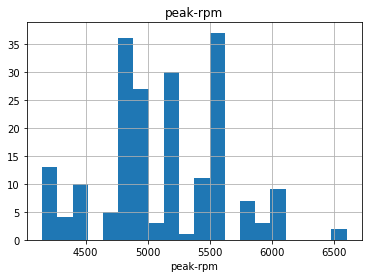

count   200.000
mean     25.200
std       6.432
min      13.000
5%       16.000
50%      24.000
90%      31.000
95%      37.000
99%      45.020
max      49.000
Name: city-mpg, dtype: float64


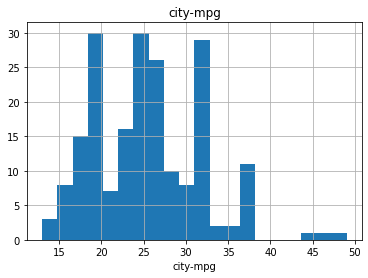

count   200.000
mean     30.705
std       6.827
min      16.000
5%       22.000
50%      30.000
90%      38.000
95%      42.000
99%      50.030
max      54.000
Name: highway-mpg, dtype: float64


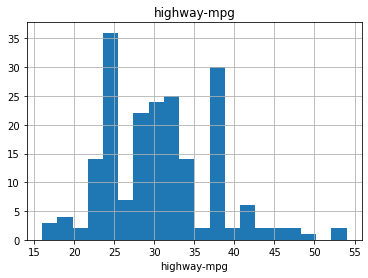

count     200.000
mean    13205.690
std      7966.983
min      5118.000
5%       6184.300
50%     10270.000
90%     22485.500
95%     32603.000
99%     40963.550
max     45400.000
Name: price, dtype: float64


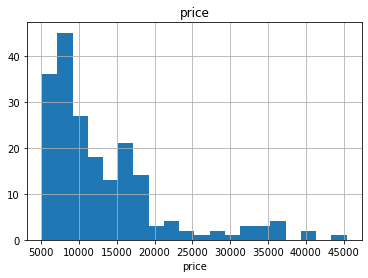

In [17]:
# 3- Analysis of Numerical Variables

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.50, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [18]:
# 4- Analysis of Target Variable

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "price", col)

           TARGET_MEAN
fuel-type             
diesel       15838.150
gas          12913.194


            TARGET_MEAN
aspiration             
std           12536.372
turbo         16254.806


              TARGET_MEAN
num-of-doors             
four            13565.673
two             12810.165


             TARGET_MEAN
body-style              
convertible    23569.600
hardtop        22208.500
hatchback       9957.441
sedan          14459.755
wagon          12371.960


              TARGET_MEAN
drive-wheels             
4wd             10241.000
fwd              9244.780
rwd             19842.243


                 TARGET_MEAN
engine-location             
front              12880.985
rear               34528.000


             TARGET_MEAN
engine-type             
dohc           18536.545
l              14627.583
ohc            11567.359
ohcf           13738.600
ohcv           25098.385
rotor          13020.000


                  TARGET_MEAN
num-of-cylinders             
eight        

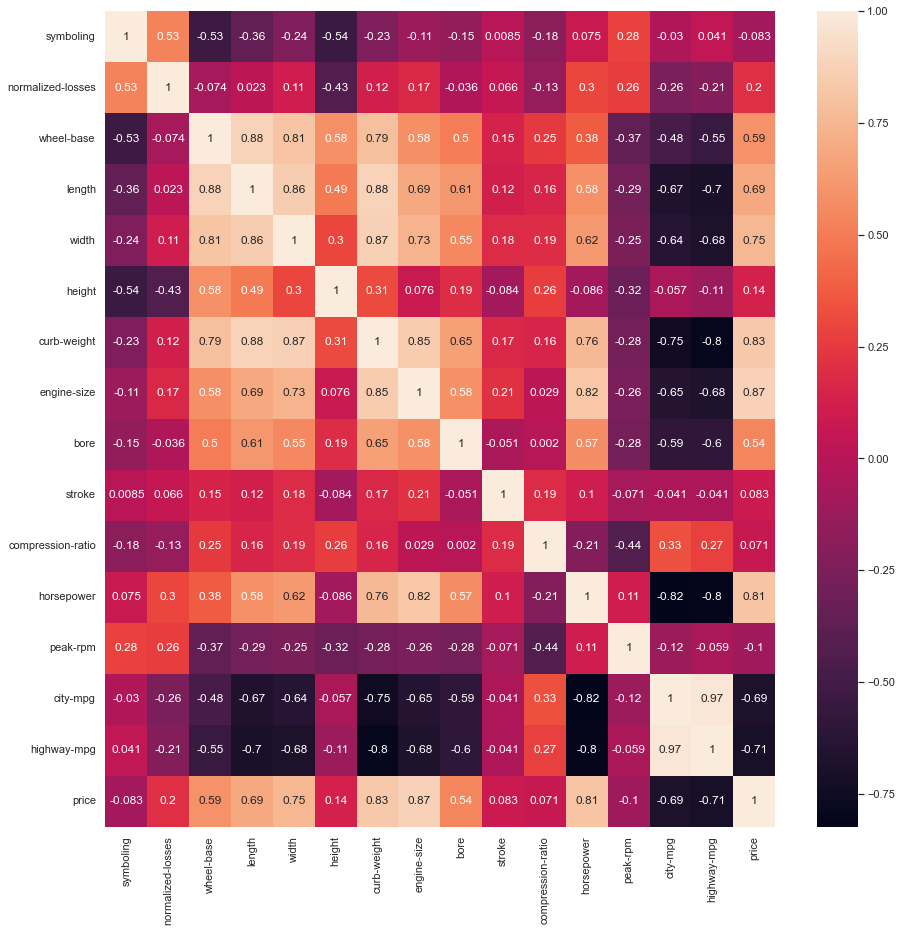

['highway-mpg']

In [19]:
# 5- Analysis of Correlation

def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, annot=True)
        plt.show()
    return drop_list

high_correlated_cols(df, plot=True)

## Step 5 :- Advanced Functional EDA

In [20]:
# 1. Outliers

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

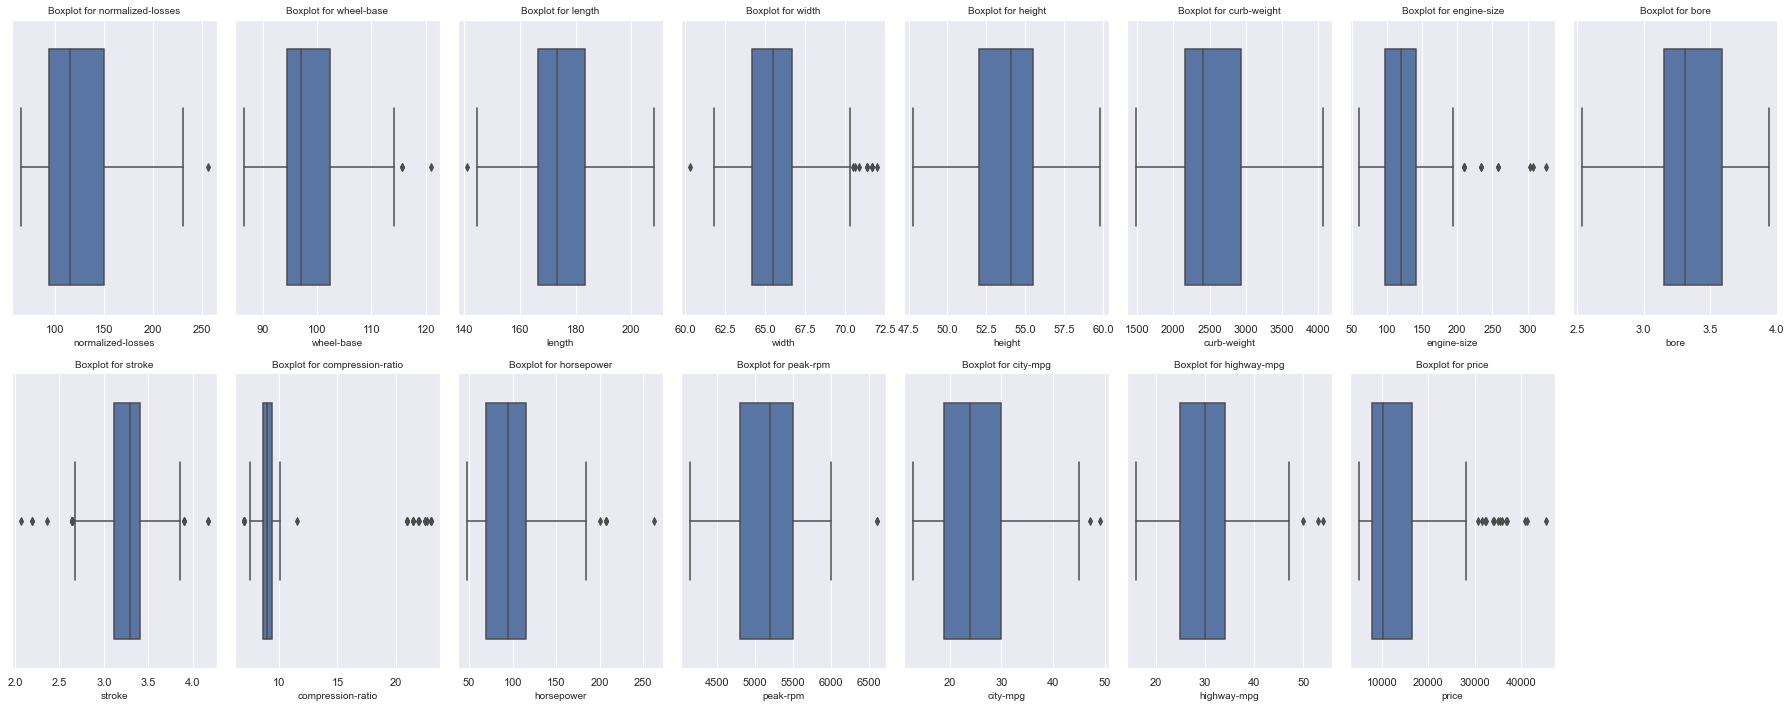

In [21]:
#Checking for outlier with boxplots
plt.figure(figsize=(25,10))
plot_number=1
for col in num_cols:
    if plot_number<16:
        plt.subplot(2,8,plot_number)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=10)
        plt.title(f"Boxplot for {col}",fontsize=10)
    plot_number+=1
plt.tight_layout()

In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [23]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

normalized-losses True
wheel-base True
length True
width True
height False
curb-weight False
engine-size True
bore False
stroke True
compression-ratio True
horsepower True
peak-rpm True
city-mpg True
highway-mpg True
price True


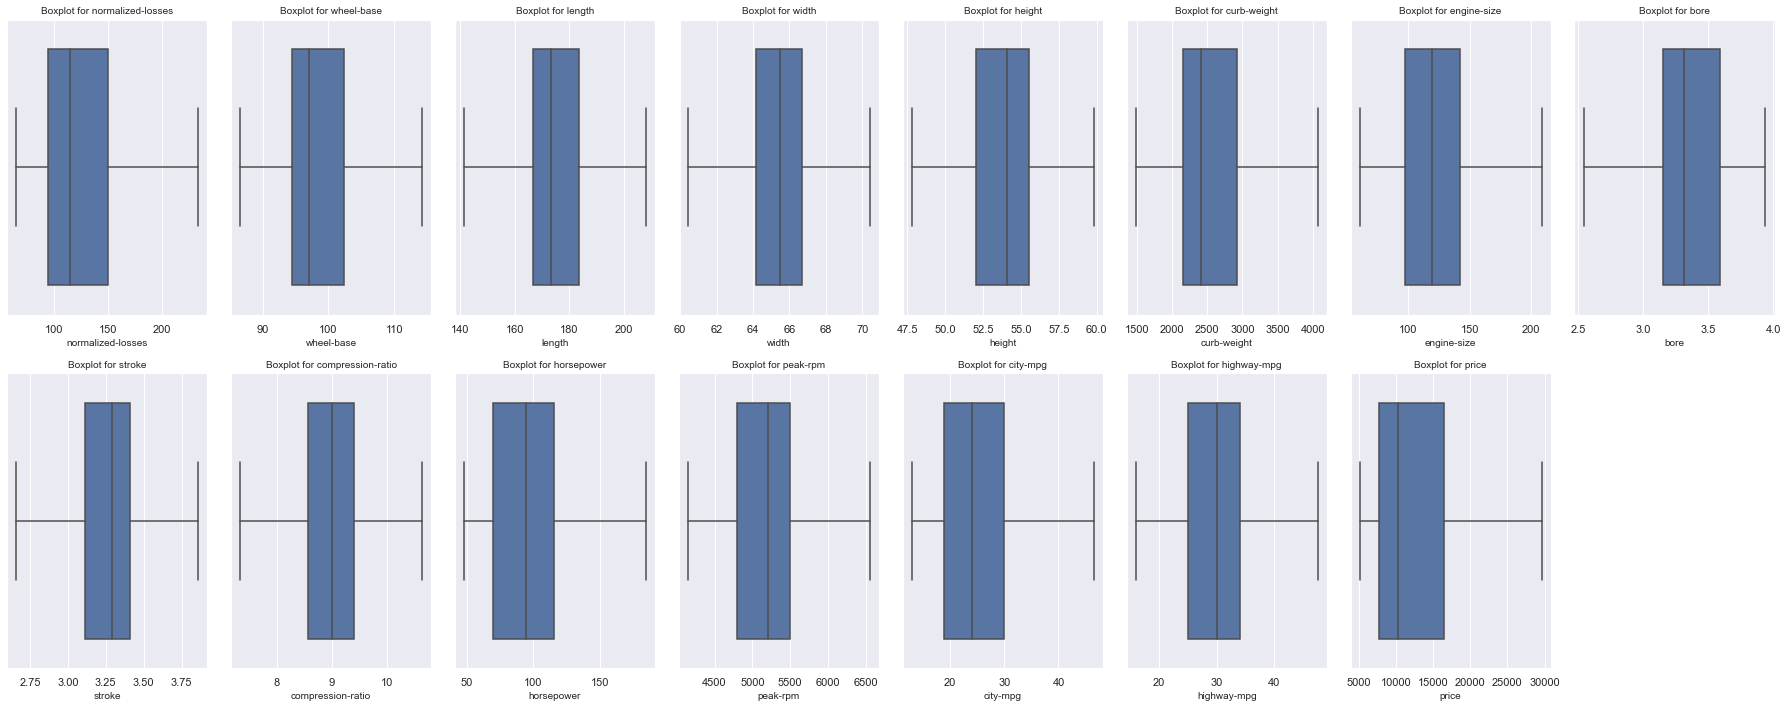

In [24]:
#Checking for outlier with boxplots
plt.figure(figsize=(25,10))
plot_number=1
for col in num_cols:
    if plot_number<16:
        plt.subplot(2,8,plot_number)
        sns.boxplot(x=df[col])
        plt.xlabel(col,fontsize=10)
        plt.title(f"Boxplot for {col}",fontsize=10)
    plot_number+=1
plt.tight_layout()

In [25]:
# 2. Missing Values

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [26]:
missing_values_table(df, na_name=True)

                   n_miss  ratio
normalized-losses      36 18.000
bore                    4  2.000
stroke                  4  2.000
num-of-doors            2  1.000
horsepower              2  1.000
peak-rpm                2  1.000


['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm']

In [27]:
# Replace using median and mode

median1 = df["normalized-losses"].median()
df["normalized-losses"].fillna(median1, inplace=True)

median2 = df["bore"].median()
df["bore"].fillna(median2, inplace=True)

median3 = df["stroke"].median()
df["stroke"].fillna(median3, inplace=True)

median4 = df["horsepower"].median()
df["horsepower"].fillna(median4, inplace=True)

median5 = df["peak-rpm"].median()
df["peak-rpm"].fillna(median5, inplace=True)

df["num-of-doors"].fillna("four", inplace=True)

In [28]:
missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [29]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.000,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130.000,mpfi,3.470,2.680,9.000,111.000,5000.000,21.000,27.000,16500.000
1,1,115.000,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152.000,mpfi,2.680,3.470,9.000,154.000,5000.000,19.000,26.000,16500.000
2,2,164.000,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109.000,mpfi,3.190,3.400,10.000,102.000,5500.000,24.000,30.000,13950.000
3,2,164.000,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136.000,mpfi,3.190,3.400,8.000,115.000,5500.000,18.000,22.000,17450.000
4,2,115.000,audi,gas,std,two,sedan,fwd,front,99.800,177.300,66.300,53.100,2507,ohc,five,136.000,mpfi,3.190,3.400,8.500,110.000,5500.000,19.000,25.000,15250.000
5,1,158.000,audi,gas,std,four,sedan,fwd,front,105.800,192.700,70.425,55.700,2844,ohc,five,136.000,mpfi,3.190,3.400,8.500,110.000,5500.000,19.000,25.000,17710.000
6,1,115.000,audi,gas,std,four,wagon,fwd,front,105.800,192.700,70.425,55.700,2954,ohc,five,136.000,mpfi,3.190,3.400,8.500,110.000,5500.000,19.000,25.000,18920.000
7,1,158.000,audi,gas,turbo,four,sedan,fwd,front,105.800,192.700,70.425,55.900,3086,ohc,five,131.000,mpfi,3.130,3.400,8.300,140.000,5500.000,17.000,20.000,23875.000
8,2,192.000,bmw,gas,std,two,sedan,rwd,front,101.200,176.800,64.800,54.300,2395,ohc,four,108.000,mpfi,3.500,2.800,8.800,101.000,5800.000,23.000,29.000,16430.000
9,0,192.000,bmw,gas,std,four,sedan,rwd,front,101.200,176.800,64.800,54.300,2395,ohc,four,108.000,mpfi,3.500,2.800,8.800,101.000,5800.000,23.000,29.000,16925.000


In [30]:
# 3. Feature Engineering

In [31]:
# One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols)
    return dataframe

In [32]:
new_cat_cols = [col for col in cat_cols if col not in num_but_cat]
new_cat_cols

['fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [33]:
# for categoric columns

df = one_hot_encoder(df, new_cat_cols, drop_first=True)

In [34]:
df.head()

,symboling,normalized-losses,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,...,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.000,alfa-romero,88.600,168.800,64.100,48.800,2548,130.000,3.470,2.680,9.000,111.000,5000.000,21.000,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,115.000,alfa-romero,94.500,171.200,65.500,52.400,2823,152.000,2.680,3.470,9.000,154.000,5000.000,19.000,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2,164.000,audi,99.800,176.600,66.200,54.300,2337,109.000,3.190,3.400,10.000,102.000,5500.000,24.000,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,2,164.000,audi,99.400,176.600,66.400,54.300,2824,136.000,3.190,3.400,8.000,115.000,5500.000,18.000,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,115.000,audi,99.800,177.300,66.300,53.100,2507,136.000,3.190,3.400,8.500,110.000,5500.000,19.000,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear', 'engine-type_dohc', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor', 'num-of-cylinders_eight', 'num-of-cylinders_five', 'num-of-cylinders_four', 'num-of-cylinders_six',
       'num-of-cylinders_three', 'num-of-cylinders_twelve', 'num-of-cylinders_two', 'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-

In [36]:
# Ordinal Encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoder(dataframe, categorical_columns):
  ordinalencoder = OrdinalEncoder()
  dataframe[categorical_columns] = ordinalencoder.fit_transform(dataframe[categorical_columns])
  return dataframe

In [37]:
num_but_cat

['symboling']

In [38]:
# for symboling column : num_but_cat 

#symboling_ordinal = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() >= 2]

df = ordinal_encoder(df, num_but_cat)

In [39]:
# Encoding for make column

#!pip install category_encoders
import category_encoders as ce
targetenc = ce.TargetEncoder() 

In [40]:
df["new_make"] = targetenc.fit_transform(df['make'],df['price'])

In [41]:
print(df['new_make'], df['make'], df["price"])

0     15493.958
1     15493.958
2     17825.034
3     17825.034
4     17825.034
         ...   
195   18062.941
196   18062.941
197   18062.941
198   18062.941
199   18062.941
Name: new_make, Length: 200, dtype: float64 0      alfa-romero
1      alfa-romero
2             audi
3             audi
4             audi
          ...     
195          volvo
196          volvo
197          volvo
198          volvo
199          volvo
Name: make, Length: 200, dtype: object 0     16500.000
1     16500.000
2     13950.000
3     17450.000
4     15250.000
         ...   
195   16845.000
196   19045.000
197   21485.000
198   22470.000
199   22625.000
Name: price, Length: 200, dtype: float64


In [42]:
df = df.drop('make',axis = 1)

In [43]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,new_make
0,5.000,115.000,88.600,168.800,64.100,48.800,2548,130.000,3.470,2.680,9.000,111.000,5000.000,21.000,27.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,15493.958
1,3.000,115.000,94.500,171.200,65.500,52.400,2823,152.000,2.680,3.470,9.000,154.000,5000.000,19.000,26.000,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,15493.958
2,4.000,164.000,99.800,176.600,66.200,54.300,2337,109.000,3.190,3.400,10.000,102.000,5500.000,24.000,30.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17825.034
3,4.000,164.000,99.400,176.600,66.400,54.300,2824,136.000,3.190,3.400,8.000,115.000,5500.000,18.000,22.000,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,17825.034
4,4.000,115.000,99.800,177.300,66.300,53.100,2507,136.000,3.190,3.400,8.500,110.000,5500.000,19.000,25.000,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,17825.034


In [44]:
df.tail(20)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,new_make
180,4.000,94.000,97.300,171.700,65.500,55.700,2212,109.000,3.190,3.400,9.000,85.000,5250.000,27.000,34.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
181,4.000,94.000,97.300,171.700,65.500,55.700,2275,109.000,3.190,3.400,9.000,85.000,5250.000,27.000,34.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
182,4.000,94.000,97.300,171.700,65.500,55.700,2319,97.000,3.010,3.400,10.638,68.000,4500.000,37.000,42.000,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,10077.545
183,4.000,94.000,97.300,171.700,65.500,55.700,2300,109.000,3.190,3.400,10.000,100.000,5500.000,26.000,32.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
184,5.000,115.000,94.500,159.300,64.200,55.600,2254,109.000,3.190,3.400,8.500,90.000,5500.000,24.000,29.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
185,5.000,234.000,94.500,165.700,64.000,51.400,2221,109.000,3.190,3.400,8.500,90.000,5500.000,24.000,29.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
186,2.000,115.000,100.400,180.200,66.900,55.100,2661,136.000,3.190,3.400,8.500,110.000,5500.000,19.000,24.000,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
187,2.000,115.000,100.400,180.200,66.900,55.100,2579,97.000,3.010,3.400,10.638,68.000,4500.000,33.000,38.000,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,10077.545
188,2.000,115.000,100.400,183.100,66.900,55.100,2563,109.000,3.190,3.400,9.000,88.000,5500.000,25.000,31.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10077.545
189,0.000,103.000,104.300,188.800,67.200,56.200,2912,141.000,3.780,3.150,9.500,114.000,5400.000,23.000,28.000,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,18062.941


In [45]:
# Feature Scaling

num_cols = [col for col in num_cols if col != ("price")]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
num_cols

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [46]:
df["price"].head(10)

0   16500.000
1   16500.000
2   13950.000
3   17450.000
4   15250.000
5   17710.000
6   18920.000
7   23875.000
8   16430.000
9   16925.000
Name: price, dtype: float64

In [47]:
y = df["price"]
X = df.drop(["price"], axis=1)

In [48]:
X

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,new_make
0,5.000,-0.178,-1.734,-0.441,-0.885,-2.061,-0.015,0.161,0.524,-2.129,-0.049,0.243,-0.249,-0.658,-0.550,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,15493.958
1,3.000,-0.178,-0.731,-0.246,-0.178,-0.574,0.517,0.811,-2.425,0.736,-0.049,1.470,-0.249,-0.972,-0.702,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,15493.958
2,4.000,1.369,0.170,0.193,0.175,0.210,-0.423,-0.459,-0.521,0.482,1.202,-0.014,0.800,-0.186,-0.096,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17825.034
3,4.000,1.369,0.102,0.193,0.276,0.210,0.519,0.339,-0.521,0.482,-1.299,0.357,0.800,-1.129,-1.308,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,17825.034
4,4.000,-0.178,0.170,0.249,0.225,-0.285,-0.094,0.339,-0.521,0.482,-0.674,0.214,0.800,-0.972,-0.854,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,17825.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000,-0.809,1.751,1.183,1.537,0.705,0.766,0.486,1.681,-0.424,0.576,0.328,0.591,-0.343,-0.399,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,18062.941
196,1.000,-0.809,1.751,1.183,1.487,0.705,0.954,0.486,1.681,-0.424,-0.424,1.641,0.381,-0.972,-0.854,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,18062.941
197,1.000,-0.809,1.751,1.183,1.537,0.705,0.882,1.432,0.935,-1.440,-0.299,0.899,0.800,-1.129,-1.157,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,18062.941
198,1.000,-0.809,1.751,1.183,1.537,0.705,1.278,0.605,-1.193,0.482,1.999,0.100,-0.668,0.128,-0.550,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,18062.941


In [49]:
y

0     16500.000
1     16500.000
2     13950.000
3     17450.000
4     15250.000
         ...   
195   16845.000
196   19045.000
197   21485.000
198   22470.000
199   22625.000
Name: price, Length: 200, dtype: float64

In [50]:
df.shape

(200, 54)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
models = [('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [53]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
 
 # Here we have the lowest errors with RF, GBM, XGBoost, CatBoost, LightGbm, and CART respectively.

RMSE: 3014.8628 (CART) 
RMSE: 2001.3254 (RF) 
RMSE: 2283.6955 (GBM) 
RMSE: 2229.4693 (XGBoost) 
RMSE: 2374.5301 (LightGBM) 
RMSE: 2361.0213 (CatBoost) 


## Step 6 :- Model Evaluation

## 1- RF, Random Forest Regressor          

In [54]:
# Initializing the Random Forest Regression model with 10 decision trees
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
#rf_model.fit(X, y) 
rf_model.fit(X_train, y_train) 

# Predicting the target values of the test set
y_pred = rf_model.predict(X_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
r2 = float(format(r2_score(y_test, y_pred),'.3f'))
print("RMSE: ",rmse)
print('r2: ', r2)

RMSE:  1628.899
r2:  0.957


In [55]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [56]:
############### Start: Randomized Search CV ##################################
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

from sklearn.model_selection import RandomizedSearchCV

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [57]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [59]:
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [60]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [61]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

Evaluate Random Search

In [62]:
# To determine if random search yielded a better model, we compare the base model with the best random search model.

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [63]:
# Base Model Performance
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

# Best Model Performance
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

# Improvement
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 1215.7315 degrees.
Accuracy = 90.98%.
Model Performance
Average Error: 1135.2096 degrees.
Accuracy = 91.28%.
Improvement of 0.33%.


Grid Search with Cross Validation

In [64]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [65]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 2169.6491 degrees.
Accuracy = 84.81%.
Improvement of -6.78%.


## 2- Gradient Boosting

In [66]:
#creating Gradient Boosting model
print("-----------------------GRADIENT BOOSTING MODEL--------------------------")
gbm_model=GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)
print("Accuracy of gradient boost model on training set:",gbm_model.score(X_train,y_train))
print("Accuracy of gradient boost model on test data set:",gbm_model.score(X_test,y_test))
y_pred=gbm_model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("RMSE value for gradient boost model:",rmse)
print("R2-score for gradient boost model is:",r2_score(y_test,y_pred))

-----------------------GRADIENT BOOSTING MODEL--------------------------
Accuracy of gradient boost model on training set: 0.9946442272970405
Accuracy of gradient boost model on test data set: 0.9729573303536697
RMSE value for gradient boost model: 1295.995344877311
R2-score for gradient boost model is: 0.9729573303536697


In [67]:
#creating a new gradient boosting model with grid search
print("-----------------------Gradient boosting model with best parameter----------------------------")
param_grid={"max_depth" : [2, 3, 4, 5],
            "n_estimators" : [10, 20, 30, 40, 50, 100, 200],
            "learning_rate" : [0.01, 0.1, 0.5, 0.7, 0.9, 1]}
gbm_model_grid=GradientBoostingRegressor()
gbm_model_grad_CV=GridSearchCV(estimator=gbm_model_grid,param_grid=param_grid,cv=5)

-----------------------Gradient boosting model with best parameter----------------------------


In [68]:
gbm_model_result=gbm_model_grad_CV.fit(X_train,y_train)

In [69]:
print("Best parameters:\n",gbm_model_grad_CV.best_params_)

Best parameters:
 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


In [70]:
y_pred2=gbm_model_result.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred2))
print("RMSE value for gradient boost model:",rmse)
print("R2-score for gradient boost model is:",r2_score(y_test,y_pred2))

RMSE value for gradient boost model: 1596.1901508299416
R2-score for gradient boost model is: 0.9589784625713391


## 3- XGBoost

In [71]:
# fit model to training data
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

score_train = xgb_model.score(X_train, y_train)
print("Training score: ", score_train);

# make predictions for test data
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE: %.2f" % (mse ** (1 / 2.0)))
print("r2: ", r2)

Training score:  0.9996267962290725
RMSE: 1701.11
r2:  0.9534081610772549


## 4- CatBoost

In [72]:
print("-----------------------CATBOOST REGRESSION MODEL--------------------------")
cat_model=CatBoostRegressor()
cat_model.fit(X_train,y_train)
print("Accuracy of catboost model on training set:",cat_model.score(X_train,y_train))
print("Accuracy of catboost model on test data set:",cat_model.score(X_test,y_test))

-----------------------CATBOOST REGRESSION MODEL--------------------------
Learning rate set to 0.03065
0:	learn: 6146.5029393	total: 3.37ms	remaining: 3.37s
1:	learn: 6032.5848068	total: 5.97ms	remaining: 2.98s
2:	learn: 5894.2671627	total: 8.79ms	remaining: 2.92s
3:	learn: 5763.6346026	total: 11.6ms	remaining: 2.88s
4:	learn: 5657.0262692	total: 14.4ms	remaining: 2.88s
5:	learn: 5566.3653070	total: 17.1ms	remaining: 2.83s
6:	learn: 5473.1607168	total: 19.8ms	remaining: 2.81s
7:	learn: 5375.4147867	total: 22.6ms	remaining: 2.81s
8:	learn: 5277.7970932	total: 25.3ms	remaining: 2.79s
9:	learn: 5182.0547402	total: 26.7ms	remaining: 2.64s
10:	learn: 5083.5679591	total: 29.3ms	remaining: 2.64s
11:	learn: 4995.5171936	total: 31.9ms	remaining: 2.63s
12:	learn: 4905.7064306	total: 34.8ms	remaining: 2.64s
13:	learn: 4816.0061189	total: 37.5ms	remaining: 2.64s
14:	learn: 4723.3475940	total: 40.2ms	remaining: 2.64s
15:	learn: 4638.0644641	total: 43ms	remaining: 2.65s
16:	learn: 4565.1927421	tota

In [73]:
y_pred=cat_model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("RMSE value for catboost model:",rmse)
print("R2-score for catboost model is:",r2_score(y_test,y_pred))

RMSE value for catboost model: 2001.9642178187937
R2-score for catboost model is: 0.9354709455580346


In [74]:
parameters = {'depth' : [6,8,10],
              'learning_rate' : [0.01, 0.05, 0.1],
              'iterations'    : [30, 50, 100]
              }

cat_grid = GridSearchCV(estimator=cat_model, param_grid = parameters, cv = 2, n_jobs=-1)
cat_grid.fit(X_train, y_train)

0:	learn: 5836.9852529	total: 2.88ms	remaining: 285ms
1:	learn: 5478.9504536	total: 5.83ms	remaining: 286ms
2:	learn: 5104.8627649	total: 8.59ms	remaining: 278ms
3:	learn: 4759.9196852	total: 11.3ms	remaining: 270ms
4:	learn: 4500.8554059	total: 14ms	remaining: 266ms
5:	learn: 4290.6032651	total: 16.8ms	remaining: 263ms
6:	learn: 4066.8809137	total: 19.2ms	remaining: 256ms
7:	learn: 3848.6964319	total: 21.7ms	remaining: 250ms
8:	learn: 3640.9574404	total: 24.6ms	remaining: 249ms
9:	learn: 3447.0303039	total: 26ms	remaining: 234ms
10:	learn: 3243.0387382	total: 28.5ms	remaining: 231ms
11:	learn: 3093.3560249	total: 31.2ms	remaining: 229ms
12:	learn: 2951.8079991	total: 33.9ms	remaining: 227ms
13:	learn: 2790.7774806	total: 36.5ms	remaining: 224ms
14:	learn: 2665.1197536	total: 39.1ms	remaining: 222ms
15:	learn: 2550.7924067	total: 41.7ms	remaining: 219ms
16:	learn: 2431.0699944	total: 44.5ms	remaining: 217ms
17:	learn: 2317.7269367	total: 47.1ms	remaining: 214ms
18:	learn: 2211.7261320	

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DE9BD914F0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [75]:
y_pred=cat_grid.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("RMSE value for catboost model:",rmse)
print("R2-score for catboost model is:",r2_score(y_test,y_pred))

RMSE value for catboost model: 2030.0779611901596
R2-score for catboost model is: 0.9336458465777621


## 5- Light GBM

In [76]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

print("Accuracy of gradient boost model on training set:",lgbm_model.score(X_train,y_train))
print("Accuracy of gradient boost model on test data set:",lgbm_model.score(X_test,y_test))
y_pred=lgbm_model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("RMSE value for LGBM is : ",rmse)
print("R2-score for LGBM is : ",r2_score(y_test,y_pred))

Accuracy of gradient boost model on training set: 0.97874251548931
Accuracy of gradient boost model on test data set: 0.9578617615964606
RMSE value for LGBM is :  1617.770262732187
R2-score for LGBM is :  0.9578617615964606


In [77]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [78]:
lgbm_params = {
 'colsample_bytree': [0.1, 0.2, 0.5, 0.9, 1.0],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [-1, 1],
  'n_estimators': [1, 2, 5, 10, 50, 100],
 }

In [79]:
lgbm_model_grid_CV = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [80]:
lgbm_model_grid_CV.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': -1,
 'n_estimators': 100}

In [81]:
lgbm_model_grid_CV.best_score_

0.8739267427968989

In [82]:
lgbm_model_result=lgbm_model_grid_CV.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [83]:
y_pred = lgbm_model_result.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("RMSE value for LGBM is : ",rmse)
print("R2-score for LGBM is : ",r2_score(y_test,y_pred))

RMSE value for LGBM is :  1751.4081013369923
R2-score for LGBM is :  0.9506124607106319


## 6- CART - Classification & Regression Tree / Decision Tree Regressor

In [84]:
reg_decision_model = DecisionTreeRegressor(max_depth=4, random_state=0).fit(X_train, y_train)

In [85]:
y_pred = reg_decision_model.predict(X_test)
print("The r2 score is:",r2_score(y_test,y_pred))
print("The RMSE value for decison tree model is:", sqrt(mean_squared_error(y_test, y_pred)))

The r2 score is: 0.9316392669507084
The RMSE value for decison tree model is: 2060.5445836783383


In [86]:
reg_decision_model.score(X_train,y_train)

0.9385005896928388

In [87]:
reg_decision_model.score(X_test,y_test)

0.9316392669507084

Model Tuning

In [88]:
prediction=reg_decision_model.predict(X_test)

<AxesSubplot:xlabel='price', ylabel='Density'>

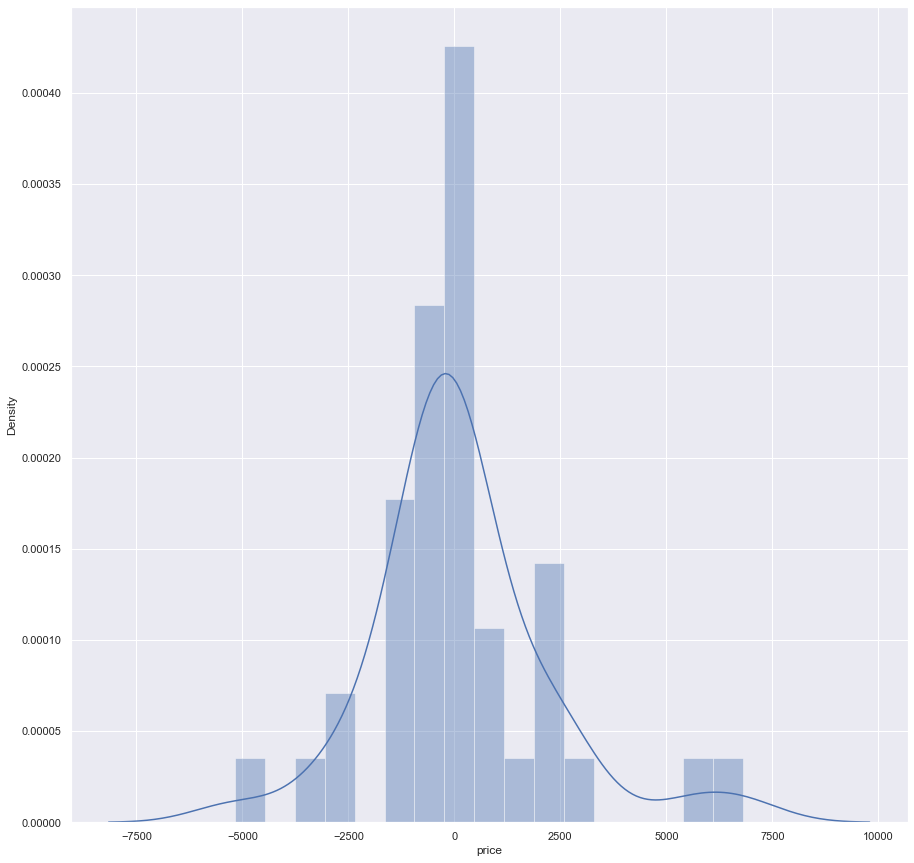

In [89]:
sns.distplot(y_test-prediction)

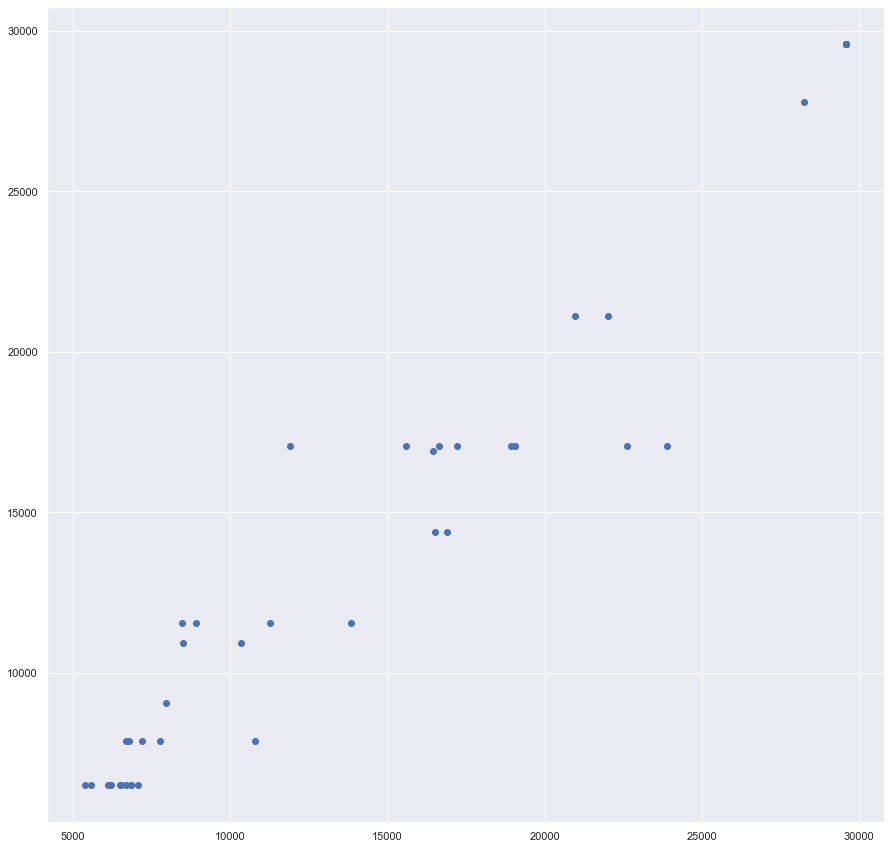

In [90]:
plt.scatter(y_test,prediction,)

Hyper Parameter Tuning

In [91]:
parameters={"splitter":["best"],
            "max_depth" : [1,3,5,7,9],
            "min_samples_leaf":[1,2],
            "min_weight_fraction_leaf":[0.01, 0.05, 0.1,0.2,0.3,0.4,0.5],
            "max_features":["auto"],
            "max_leaf_nodes":[None, 5, 10]}


In [92]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [93]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=best;, score=-23571112.392 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=best;, score=-19675632.134 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.01, splitter=best;, score=-15323983.880 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.05, splitter=best;, score=-23571112.392 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.05, splitter=best;, score=-19675632.134 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(max_depth=4, random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9], 'max_features': ['auto'],
                         'max_leaf_nodes': [None, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_weight_fraction_leaf': [0.01, 0.05, 0.1, 0.2, 0.3,
                                                      0.4, 0.5],
                         'splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=3)

In [94]:
# best hyperparameters
print('Best Params : ', tuning_model.best_params_)
 
 # best model score
print('Best Model Score : ', tuning_model.best_score_)

# absolute of best model score
print(np.absolute(tuning_model.best_score_))

Best Params :  {'max_depth': 3, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.05, 'splitter': 'best'}
Best Model Score :  -6303970.338720421
6303970.338720421


In [95]:
# Best Params :  {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.01, 'splitter': 'best'}

Training Decision Tree With Best Hyperparameters

In [96]:
tuned_hyper_model= DecisionTreeRegressor(max_depth= 5, max_features= 'auto', max_leaf_nodes= 10, min_samples_leaf= 1, min_weight_fraction_leaf= 0.01, splitter= 'best')

In [97]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.01)

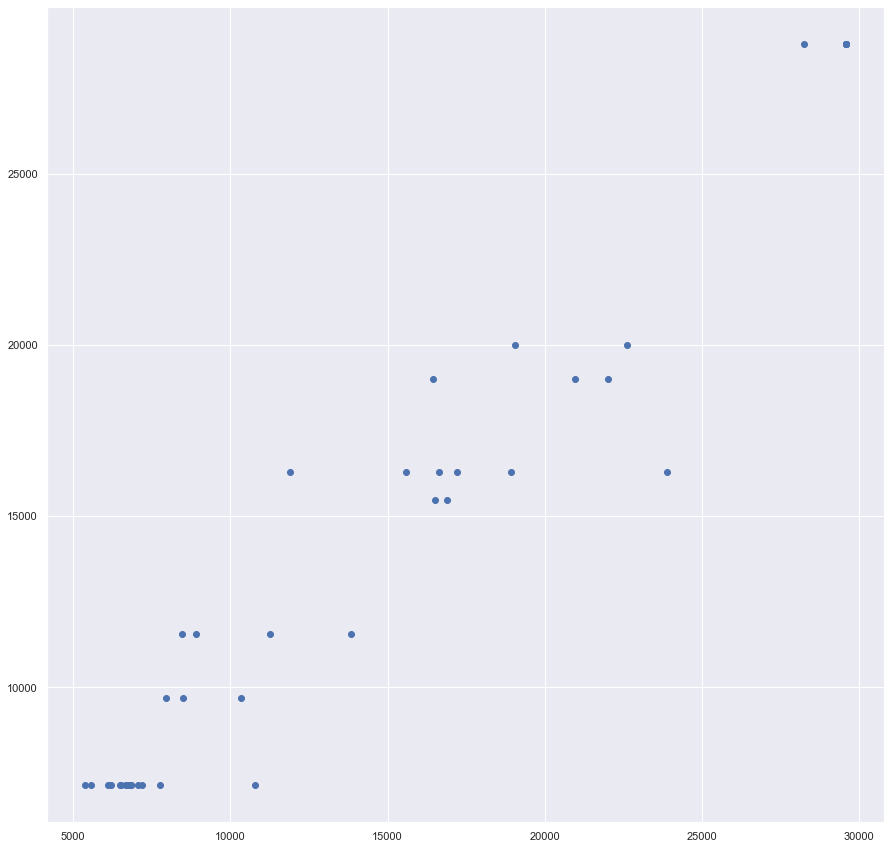

In [98]:
tuned_pred=tuned_hyper_model.predict(X_test)
plt.scatter(y_test,tuned_pred)

In [99]:
# With hyperparameter tuned
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))
print('r2: ', r2_score(y_test, tuned_pred))

MAE: 1467.572927797975
MSE: 4200279.777427124
RMSE: 2049.4584107581018
r2:  0.9323728790177187


In [100]:
# without hyperparameter tuning
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2: ', r2_score(y_test, prediction))

MAE: 1318.2073695054946
MSE: 4245843.981326136
RMSE: 2060.5445836783383
r2:  0.9316392669507084


# Knn model

In [101]:
#creating a KNN model
print("---------------------KNN Model------------------------------")
knn_rmselist=[]
for k in range(10):    k=k+1
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    knn_rmse=sqrt(mean_squared_error(y_test,knn_pred))
    print("RMSE value for k:",k,"is:",knn_rmse)
    knn_rmselist.append(knn_rmse)
print("The least RMSE value using KNN is:,",min(knn_rmselist))
print("The R2score using KNN is:",r2_score(y_test,knn_pred))

---------------------KNN Model------------------------------
RMSE value for k: 1 is: 2787.465624858112
RMSE value for k: 2 is: 2669.498125178595
RMSE value for k: 3 is: 2606.9864704433458
RMSE value for k: 4 is: 2852.0854882181375
RMSE value for k: 5 is: 2977.7611656636227
RMSE value for k: 6 is: 2997.009099555228
RMSE value for k: 7 is: 3011.8812843454025
RMSE value for k: 8 is: 3166.6978762983053
RMSE value for k: 9 is: 3324.5334190345543
RMSE value for k: 10 is: 3447.380027610755
The least RMSE value using KNN is:, 2606.9864704433458
The R2score using KNN is: 0.8086532888091209


## Extra Tree Model

In [109]:
#creating extra tree model
print("---------------------------EXTRA TREE MODEL----------------------------")
airfoil_extratree=ExtraTreesRegressor()
airfoil_extratree.fit(X_train,y_train)
print("accuracy of extratree model on training et:",airfoil_extratree.score(X_train,y_train))
print("Accuracy of extra trees model on test dataset:",airfoil_extratree.score(X_test,y_test))
pred_extratree=airfoil_extratree.predict(X_test)
rmse_extratree=sqrt(mean_squared_error(y_test,pred_extratree))
print("RMSE value for extra tree model is:",rmse_extratree)
print("The r2-score for extratree model is:",r2_score(y_test,pred_extratree))

---------------------------EXTRA TREE MODEL----------------------------
accuracy of extratree model on training et: 0.9996270040814347
Accuracy of extra trees model on test dataset: 0.9549550117654055
RMSE value for extra tree model is: 1672.637768713815
The r2-score for extratree model is: 0.9549550117654055


## ADA Boost Model

In [110]:
#Creating adaboost model
print("-----------------------------ADA BOOST MODEL----------------------")
airfoil_ada=AdaBoostRegressor()
airfoil_ada.fit(X_train,y_train)
print("Accuracy of ada boost model on training dataset:",airfoil_ada.score(X_train,y_train))
print("Accuracy of ada boost model on test data:",airfoil_ada.score(X_test,y_test))
pred_ada=airfoil_ada.predict(X_test)
rmse_ada=sqrt(mean_squared_error(y_test,pred_ada))
print("Rmse value for ada boost model is:",rmse_ada)
print("The R2-score is:",r2_score(y_test,pred_ada))

-----------------------------ADA BOOST MODEL----------------------
Accuracy of ada boost model on training dataset: 0.9601263682326651
Accuracy of ada boost model on test data: 0.9268810860218629
Rmse value for ada boost model is: 2131.0494444582064
The R2-score is: 0.9268810860218629


## Linear Regression Model

In [111]:
#applying Linear regression
LR=LinearRegression()
LR.fit(X_train,y_train)
print("Accuracy of Linear Regression model on training set:",LR.score(X_train,y_train))
print("accuracy of Linear Regression model  on test data set:",LR.score(X_test,y_test))
y_predicted=LR.predict(X_test)
print("The R2 score is:",r2_score(y_test,y_predicted))
rmse=sqrt(mean_squared_error(y_test,y_predicted))
print("The RMSE value is:",rmse)

Accuracy of Linear Regression model on training set: 0.9600260915517518
accuracy of Linear Regression model  on test data set: 0.9457507512508058
The R2 score is: 0.9457507512508058
The RMSE value is: 1835.5893292266194


# Feature Importance

In [102]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

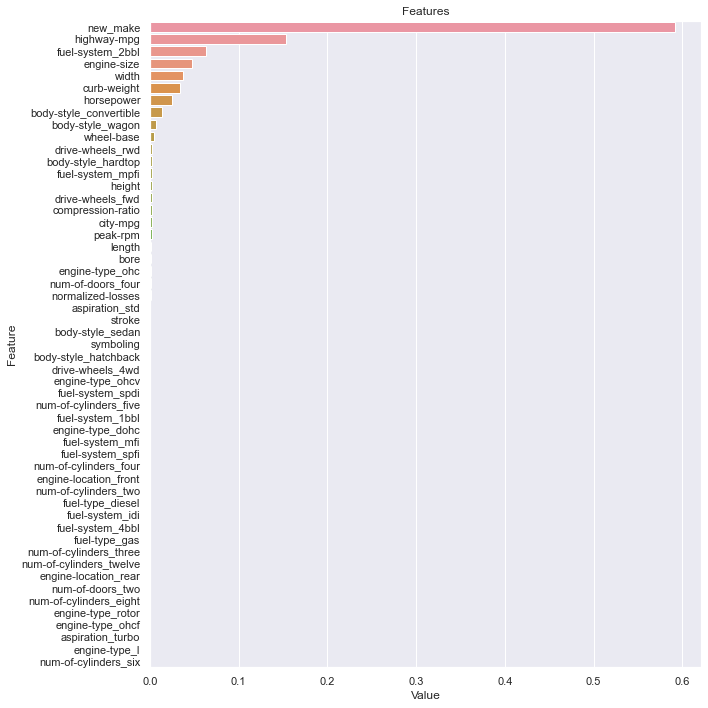

In [103]:
plot_importance(xgb_model, X) # Plotting import Feature for xgb model

### The Top 5 importand Feature for XGB Model is-
### 1. new_make- Brand /company Name
### 2. highway_mpg
### 3. fuel_system_2bbl-Fuel System Type (2bbl)
### 4. Engine_size - Size of Engine
### 5. Width- Width of Auto

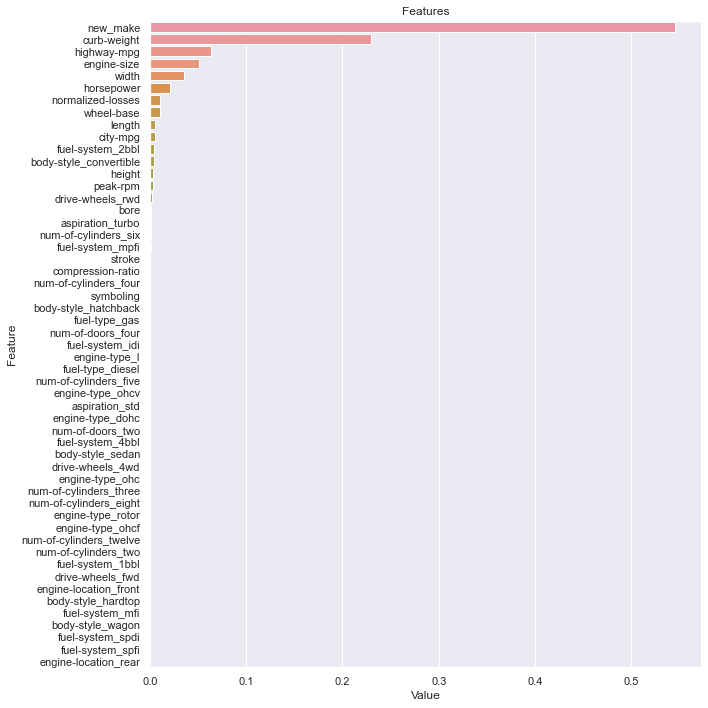

In [104]:
plot_importance(gbm_model, X) # Showing important Feature of GBM Model

### The Top 5 importand Feature for XGB Model is-
### 1. new_make- Brand /company Name
### 2. Curb_weight - the weight of the vehicle including a full tank of fuel and all standard equipment.
### 3. highway_mpg
### 4. Engine_size - Size of Engine
### 5. Width- Width of Auto

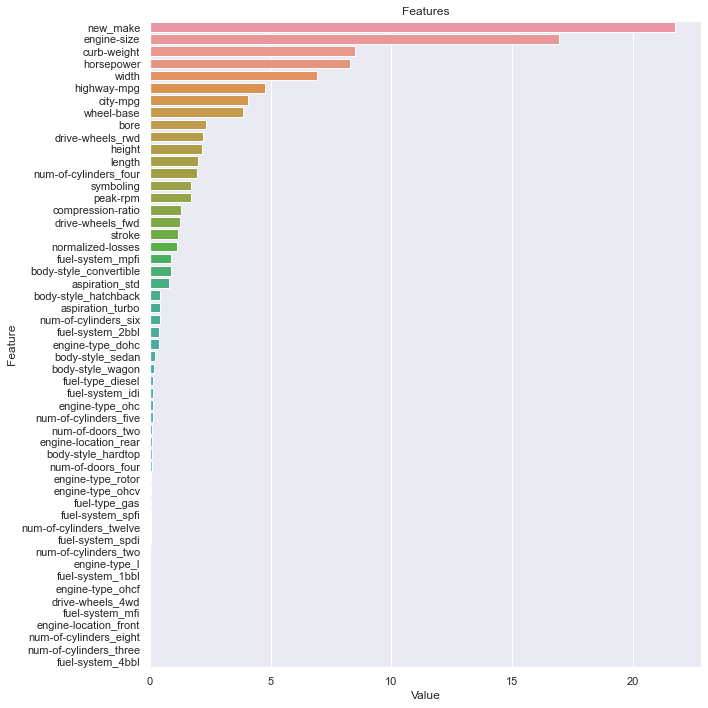

In [105]:
plot_importance(cat_model, X)

### The Top 5 importand Feature for Catboost Model is-
### 1. new_make- Brand /company Name
### 2. Engine_size - Size of Engine 
### 3. Curb_weight - the weight of the vehicle including a full tank of fuel and all standard equipment.
### 4. horsepower- The power capacity of Auto
### 5. Width- Width of Auto

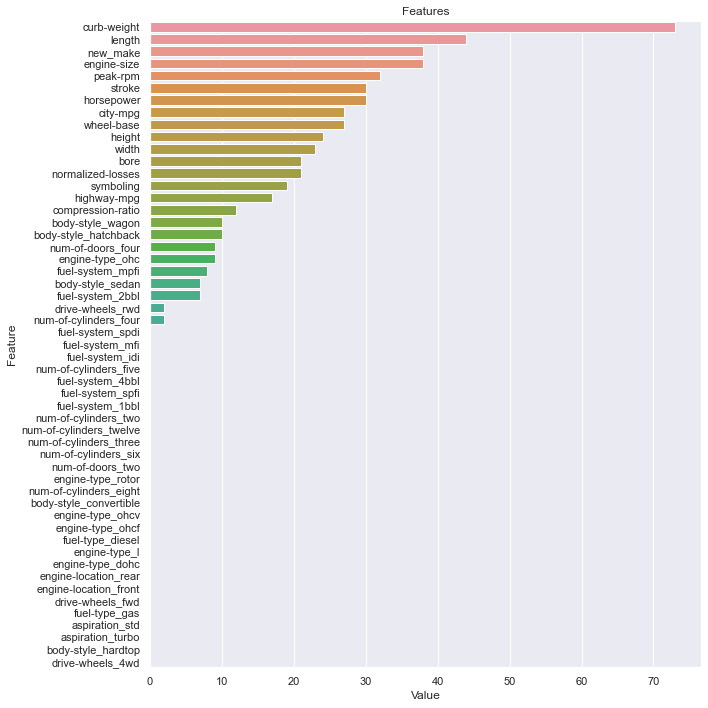

In [106]:
plot_importance(lgbm_model, X) # Plotting important feature for Light GBM Model

### The Top 5 importand Feature for Light GBM Model is-
### 1. Curb_weight - the weight of the vehicle including a full tank of fuel and all standard equipment. 
### 2. Length size
### 3. New_make- Brand /company Name
### 4. Engine_size - Size of Engine 
### 5.Peak_rpm- Highest revolutions per minute

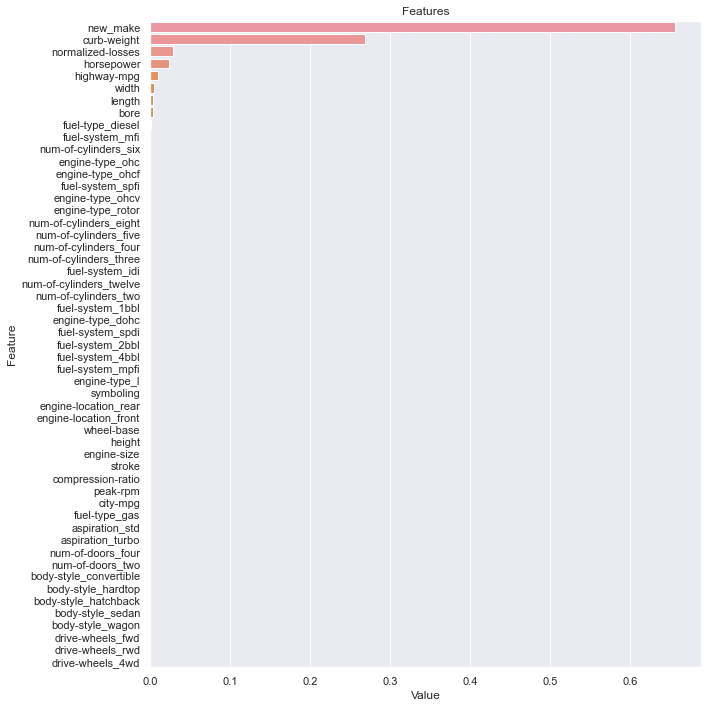

In [112]:
plot_importance(reg_decision_model, X) # Plotting import Feature for Decision Tree Model

### The Top 5 importand Feature for Decision Tree Model is-
### 1. New_make- Brand /company Name 
### 2. Curb_weight - the weight of the vehicle including a full tank of fuel and all standard equipment.  Length size
### 3. Normalized_Loss-  the relative average loss payment per insured vehicle year.
### 4. Horsepower- The power capacity of Auto 
### 5. Highway_mpg- The Average of car on Highway- straight road

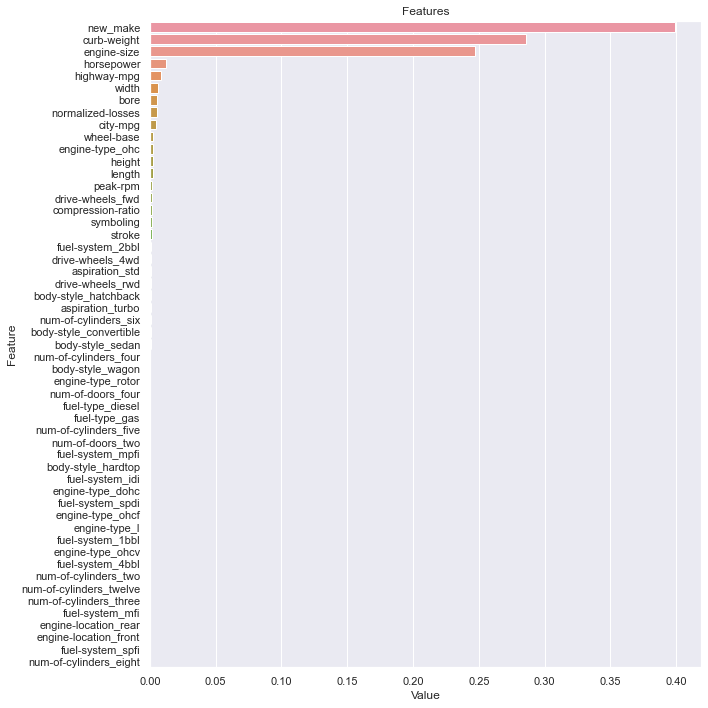

In [113]:
plot_importance(rf_model, X) # Plotting import Feature for Random Forest Model

### The Top 5 importand Feature for Random Forest Model is-
### 1. New_make- Brand /company Name 
### 2. Curb_weight - the weight of the vehicle including a full tank of fuel and all standard equipment.  Length size
### 3. Engine-Size
### 4. Horsepower- The power capacity of Auto 
### 5. Highway_mpg- The Average of car on Highway- straight road

# Conclusion :-
### By performing different ML models, we aim to get a better result or less error with max accuracy. Our purpose was to predict the price of the cars having 26 predictors and 205 data entries. Next, with the help of data visualization features were explored deeply. The relation between the features is examined. Data cleaning is performed to remove the null values and outliers from the dataset then ML models are implemented to predict the price of cars. The popular ensemble  machine  learning  algorithms  namely  Random  Forest, Gradient Boosting, XGBoost and LGBoost  are performed in order to implement a regression system for predicting car prices. All the  techniques  are  comparable  and  offer  high  accuracy.  Random  Forest  prevents overfitting  by  making  use  of  more  trees.  With  an  ability  to  handle  missing  values, prevent overfitting, XGBoost and LGBoost are  widely  used  algorithm. XGBoost and LGBoost are fast  to execute and gives appreciable accuracy. From the importance plot, it can be concluded that LGBoost is the best model for the prediction for car prices.According to the feature importance part we can see that the LGBoost model took into consideration of most columns than anyother algorithm therefore LGBoost as a regression model gave the best MSE ,RMSE and r2 values.